<a href="https://colab.research.google.com/github/CarlMk7734/project4/blob/main/project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import plotly.express as px
import plotly.graph_objects as go


loading the dataset

In [36]:
df = pd.read_csv('craigslist_vehicles.csv',
                 delimiter=",",
                 engine="python",
                 on_bad_lines='skip',
                 encoding='utf-8')

df.head()


,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,362710,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00


In [37]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'county', 'state', 'lat',
       'long', 'posting_date', 'removal_date'],
      dtype='object')

In [38]:
df['posting_date'] = pd.to_datetime(df['posting_date'],  utc=True)

In [39]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,362710,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00


In [40]:
df.isnull().sum()

Unnamed: 0         0
id                 0
url                0
region             0
region_url         0
price              0
year               2
manufacturer     259
model            142
condition       3017
cylinders       3744
fuel              16
odometer          22
title_status     155
transmission      47
VIN             3287
drive           2546
size            5964
type            1855
paint_color     2473
image_url          0
description        0
county          8163
state              0
lat              114
long             114
posting_date       0
removal_date       0
dtype: int64

In [41]:
new_df = df.drop('county', axis=1, inplace=True)

<Axes: >

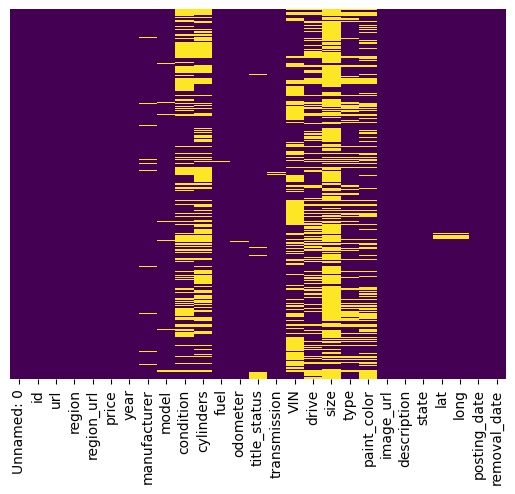

In [42]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [43]:
def handle_missing_values(df):
    numerical_columns = ['year', 'odometer']
    df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

    categorical_columns = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
                           'transmission', 'drive', 'size', 'type', 'paint_color', 'posting_date']
    df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))
    return df
df = handle_missing_values(df)

In [44]:
def convert_to_tz_aware(posting_date):
    if not posting_date.tzinfo:
        return posting_date.replace(tzinfo=pytz.utc)
    else:
        return posting_date
df['posting_date'] = df['posting_date'].apply(convert_to_tz_aware)
df_agg = df.groupby(['region', 'type', 'posting_date']).size().reset_index(name='count')
df_agg = df_agg.sort_values(by='posting_date')
print(df_agg.head())

      region         type              posting_date  count
425   albany  convertible 2021-04-04 00:00:00+00:00      1
25   abilene        coupe 2021-04-04 00:00:00+00:00      1
524   albany        other 2021-04-04 00:00:00+00:00      2
506   albany     mini-van 2021-04-04 00:00:00+00:00      1
476   albany    hatchback 2021-04-04 00:00:00+00:00      5


In [45]:
df_freq = df_agg.groupby(pd.Grouper(key='posting_date', freq='D')).sum(numeric_only=True).reset_index()

# Create a Plotly figure for the bar chart
fig_freq = go.Figure(data=go.Bar(
    x=df_freq['posting_date'],
    y=df_freq['count'],
    marker_color='green',
    opacity=0.8
))

# Customize layout
fig_freq.update_layout(
    title='Time Frequency Graph: Number of Vehicle Listings per Day',
    xaxis_title='Posting Date',
    yaxis_title='Number of Vehicle Listings',
    xaxis_tickangle=-45,
)

# Show the plot
fig_freq.show()


In [46]:
fig = px.line(df_agg, x='posting_date', y='count', color='region', line_group='type',
              title='Number of Available Vehicles Over Time by Region and Vehicle Type',
              labels={'count': 'Number of Vehicles'})
fig.update_layout(
    xaxis_title='Posting Date',
    yaxis_title='Number of Vehicles',
    hovermode='x',
    showlegend=True,
)
fig.show()

In [52]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Confirm the changes
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4773 entries, 8 to 8162
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Unnamed: 0    4773 non-null   int64              
 1   id            4773 non-null   int64              
 2   url           4773 non-null   object             
 3   region        4773 non-null   object             
 4   region_url    4773 non-null   object             
 5   price         4773 non-null   int64              
 6   year          4773 non-null   float64            
 7   manufacturer  4773 non-null   object             
 8   model         4773 non-null   object             
 9   condition     4773 non-null   object             
 10  cylinders     4773 non-null   object             
 11  fuel          4773 non-null   object             
 12  odometer      4773 non-null   float64            
 13  title_status  4773 non-null   object             
 14  transmis

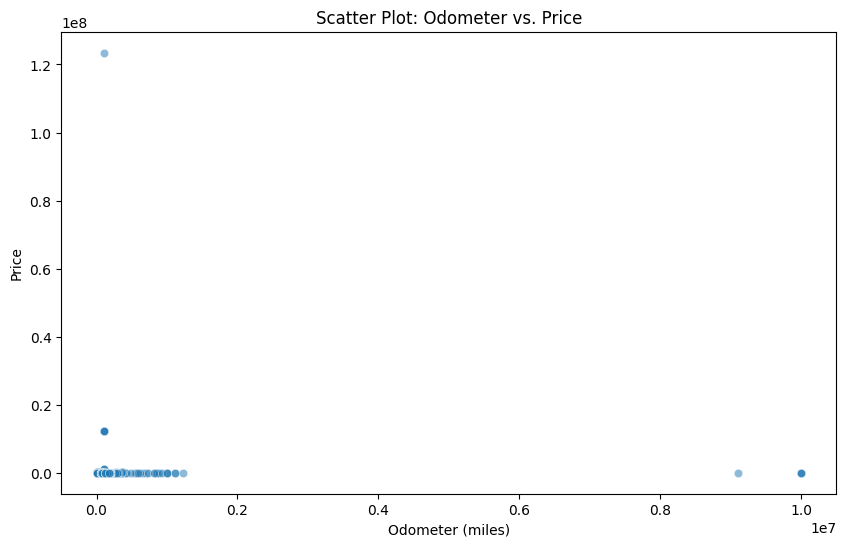

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=df, alpha=0.5)
plt.title('Scatter Plot: Odometer vs. Price')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price')
plt.show()

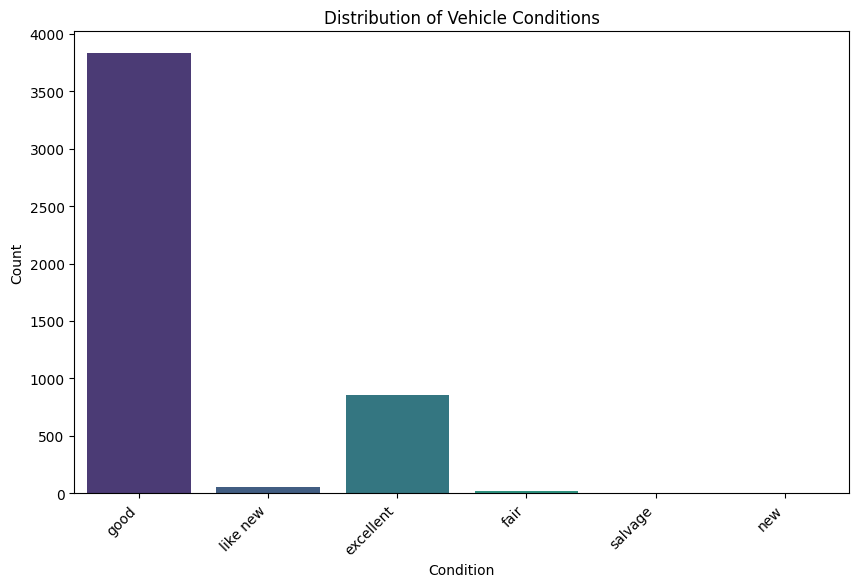

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(x='condition', data=df_cleaned, palette='viridis')
plt.title('Distribution of Vehicle Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()